In [2]:
# 10.2 特征提取
# 10.2.1 PyTorch提供的预处理模块

# 2.调用随机权重的模型
import torchvision.models as models
resnet18 = models.resnet18()
alexnet = models.alexnet()
vgg16 = models.vgg16()

In [ ]:
# 3. 获取预训练模型
# 在torch.utils.model_zoo中提供了预训练模型，通过传递参数pretrained=True来构造，具体如下代码。
# 如果pretrained=False，表示只需要网络结构，不需要用预训练模型的参数来初始化
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
58.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

66.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

73.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit

In [ ]:
# 4.注意不同模式
# 5.规范化数据
# 所有的预训练模型都要求输入图片以相同的方式进行标准化，
# 即：小批（Mini-Batch）3通道RGB格式（3×H×W），其中H和W应小于224。
# 图片加载时像素值的范围应在[0,1]内，然后通过指定mean=[0.485,0.456,0.406]和std=[0.229,0.224,0.225]进行标准化
normalize = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])

In [ ]:
# 6.如何冻结某些层
# 如果需要冻结除最后一层之外的所有网络，可设置requires_grad==False即可，主要便可冻结参数，在backward()中不计算梯度
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# 10.2.2 特征提取实例
# 第6章我们在CIFAR-10数据集上构建一个神经网络，对数据集中10类物体进行分类，使用了几层卷积层和全连接层，精确率在68%左右，这个精度显然是不尽如人意。
# 本节将使用迁移学习中特征提取方法来实现这个任务，预训练模型采用retnet18网络，精度提升到75%左右。以下是具体代码实现过程

# 1.导入模块
import torch
from torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
from datatime import datatime

In [ ]:
# 2.加载数据
# 这里数据加载与6章的基本相同，为适合预训练模型，增加了一些预处理功能，如数据标准化，对图片进行裁剪等
trans_train = transforms.Compose(
    [transforms.RamdomResizedCrop(224),
     transforms.RandomHorizontalFilp(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],
                          std=[0.229,0.224,0.225])])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=False, transform=trans_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=trans_valid)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# 3.下载预训练模型
# 使用预训练的模型
net = models.resnet18(pretrained=True)

In [ ]:
# 4.冻结模型参数
for param in net.parameters():
    param.requires_grad = False

In [ ]:
# 5.修改最后一层的输出类别数
# 原来输出为512×1000，现在把输出改为512×10，我们新数据集就有10个类别
# 将最后的全连接层改成十分类
device = torch.device("cuda:1" if torch.cuda.is_aviable() else "cpu")
net.fc = nn.Linear(512, 10)

In [ ]:
# 6.查看冻结前后的参数情况
# 查看总参数以及训练参数
total_params = sum(p.numel() for p in net.parameters())
print('原总参数个数：{}'.fornat(total_params))
total_trainable_params = sum(p.numel() for p in net.parameters () if p.requires_grad)
print('需要训练的参数个数：{}'.format(total_trainable_params))
# 原总参数个数：11181642 需训练参数个数：5130
# 如果不冻结的话，需要更新的参数非常大，冻结后，只需要更新全连接层的相关参数

In [ ]:
# 7.定义损失函数以及优化器
criterion = nn.CrossEntropyLoss()
# 只需要优化最后一层参数
optimizer = torch.optim.SGD(net.fc.parameters(), lr=1e-3, weight_decay=1e-3, momentum=0.9)

In [ ]:
# 8.训练及验证模型
train(net, trainloader, testloader, 20, optimizer, criterion)

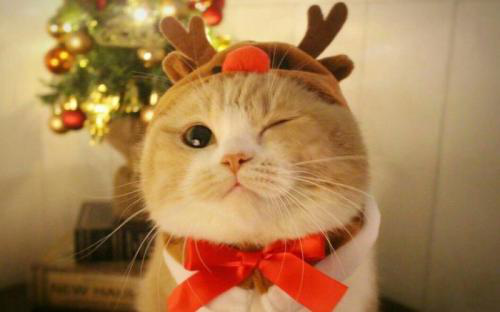

In [2]:
# 10.3 数据增强
# 10.3.1 按比例缩放
# 1.显示原图
import sys
from PIL import Image
from torchvision import transforms as trans
im = Image.open('./data/image/cat.jpg')
im

原图像大小：(500, 312)
缩放后大小：(200, 100)


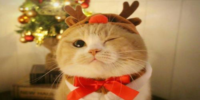

In [3]:
# 2.随机比例缩放
# 比例缩放
print('原图像大小：{}'.format(im.size))
new_im = trans.Resize((100,200))(im)
print('缩放后大小：{}'.format(new_im.size))
new_im

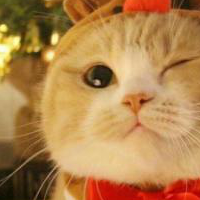

In [5]:
# 10.3.2 裁剪
# 随机裁剪有两种方式，一种是对图像在随机位置进行截取，可传入裁剪大小，
# 使用的函数为：torhvision.transforms.RandomCrop()，
# 另外一种是在中心，按比例裁剪，函数为：torchvision.transforms.CenterCrop()

# 随机裁剪出200*200的区域
random_iml = trans.RandomCrop(200)(im)
random_iml

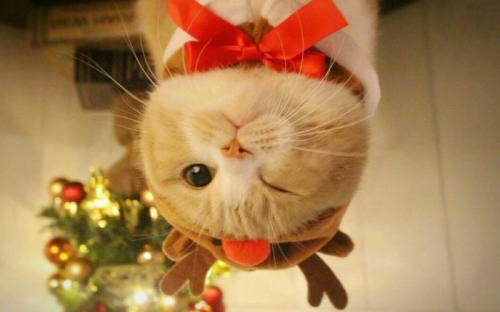

In [6]:
# 10.3.3 翻转
# 在torchvision中，随机翻转使用的是torchvision.transforms.RandomHorizontalFlip()、
# torchvision.transforms.RandomVerticalFlip()和torchvision.transforms.RandomRotation()等
# 随机竖直翻转
v_flip = trans.RandomVerticalFlip()(im)
v_flip

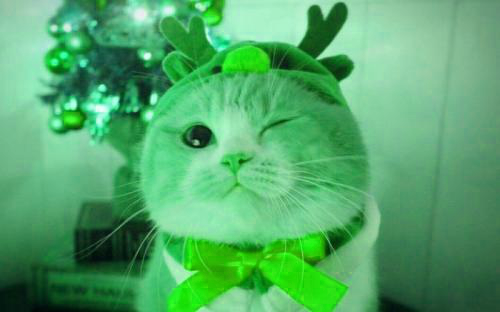

In [7]:
# 10.3.4 改变颜色
# 除了形状变化外，颜色变化又是另外一种增强方式，其可以设置亮度变化、对比度变化和颜色变化等，
# 在torchvision中主要是用torchvision.transforms.ColorJitter()来实现的

# 改变颜色
color_im = trans.ColorJitter(hue=0.5)(im) # 随机从-0.5~0.5之间对颜色进行变化
color_im

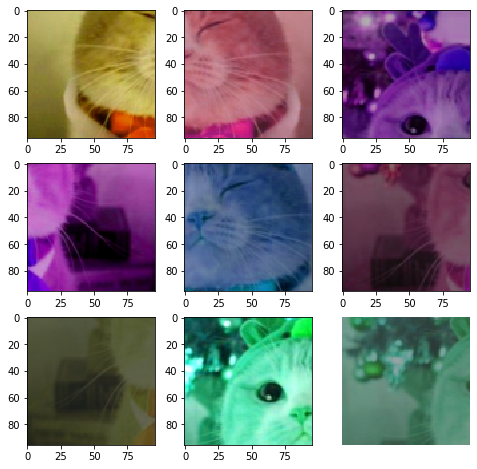

In [10]:
# 10.3.5 组合多种增强方法

# 使用torchvision.transforms.Compose()函数把以上这些变化组合在一起
im_aug = trans.Compose([
    trans.Resize(200),
    trans.RandomHorizontalFlip(),
    trans.RandomCrop(96),
    trans.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])
import matplotlib.pyplot as plt
%matplotlib inline
nrows = 3
ncols = 3
figsize = (8,8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
plt.axis('off')
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
plt.show()

In [13]:
# 10.4 微调实例
# 微调允许修改预先训练好的网络参数来学习目标任务，所以，虽然训练时间要比特征抽取方法长，但精度更高。
# 微调的大致过程是在预先训练过的网络上添加新的随机初始化层，
#　此外预先训练的网络参数也会被更新，但会使用较小的学习率以防止预先训练好的参数发生较大的改变

# 常用的方法是固定底层的参数，调整一些顶层或具体层的参数。这样做的好处是可以减少训练参数的数量，同时也有助于克服过拟合现象的发生。
# 尤其是当目标任务的数据量不足够大的时候，该方法实践起来很有效果。
# 实际上，微调要优于特征提取，因为它能够对迁移过来的预训练网络参数进行优化，使其更加适合新的任务

# 10.4.1 数据预处理
# 训练数据添加了几种数据增强方法，如图像裁剪、旋转、颜色改变等方法。测试数据与特征提取一样，没有变化
from torchvision import transforms

trans_train = transforms.Compose(
    [transforms.RandomResizedCrop(size=256, scale=(0.8,1.0)),
     transforms.RandomRotation(degrees=15),
     transforms.ColorJitter(),
     transforms.RandomResizedCrop(224),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])

In [15]:
# 10.4.2 加载预训练模型
# 使用预训练模型
import torchvision.models as models

net = models.resnet18(pretrained=True)
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
# 10.4.3 修改分类器
# 修改最后的全连接层，把类别数由最后的1000改为10
import torch
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.fc = nn.Linear(512, 10)
net.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
# 10.4.4 选择损失函数及优化器
# 这里学习率为le-3，使用微调训练模型时，会选择一个稍大一点学习率，如果选择太小，效果要差一些
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3, weight_decay=1e-3, momentum=0.9)

In [21]:
# 10.4.5 训练以及验证模型
train(net, trainloader, testloader, 20, optimizer, criterion)

NameError: name 'train' is not defined

In [22]:
# 10.5 往出图像中的雾霾
# 1.导入需要的模块
import torch
import torch.nn as nn
import torchvision
import torch.backends.cudnn as cudnn
import torch.optim
import os
import numpy as np
from torchvision import transforms
from PIL import Image
import glob

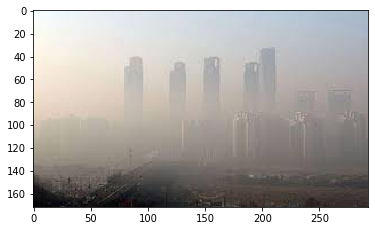

In [23]:
# 查看原来的图像
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
img = imread('./data/image/city.jpg')
plt.imshow(img)
plt.show()

In [26]:
# 3.定义一个神经网络
# 这个神经网络主要由卷积层构成，该网络将构建在预训练模型之上
class model(nn.Module):
    def __init__(self):
        super(model,self).__init__()
        self.relu = nn.ReLU(inplace=True)
        self.e_conv1 = nn.Conv2d(3,3,1,1,0,bias=True)
        self.e_conv2 = nn.Conv2d(3,3,3,1,1,bias=True)
        self.e_conv3 = nn.Conv2d(6,3,5,1,2,bias=True)
        self.e_conv4 = nn.Conv2d(6,3,7,1,3,bias=True)
        self.e_conv5 = nn.Conv3d(12,3,3,1,1,bias=True)
    
    def forward(self,x):
        source = []
        source.append(x)
        x1 = self.relu(self.e_conv1(x))
        x2 = self.relu(self.e_conv2(x1))
        concat1 = torch.cat((x1,x2), 1)
        x3 = self.relu(self.e_conv3(concat1))
        concat2 = torch.cat((x2,x3), 1)
        x4 = self.relu(self.e_conv4(concat2))
        concat3 = torch.cat((x1,x2,x3,x4), 1)
        x5 = self.relu(self.e_conv5(concat3))
        clean_image = self.relu((x5*x)-x5+1)
        return clean_image

In [28]:
# 4.训练模型
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = model().to(device)

def cl_image(image_path):
    data = Image.open(image_path)
    data = (np.asarray(data)/255.0)
    data = torch.from_numpy(data).float()
    # 将tensor的维度换位
    data = data.permute(2,0,1)
    data = data.to(device).unsqueeze(0)
    # 装载预训练模型
    net.load_state_dict(torch.load('clean_photo/dehazer.pth'))
    clean_image = net.forward(data)
    torchvision.utils.save_image(torch.cat((data, clean_image), 0), './data/image/'+image_path.split("/")[-1])
    
if __name__ == '__main__':
    test_list = glob.glob('./data/image/city.jpg')
    for image in test_list:
        cl_image(image)
        print(image, "done")

FileNotFoundError: [Errno 2] No such file or directory: 'clean_photo/dehazer.pth'

<function matplotlib.pyplot.show(*args, **kw)>

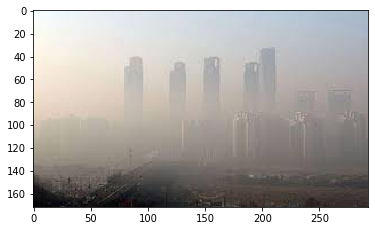

In [29]:
# 5.查看处理后的图像
# 处理后的图像与原图像拼接在一起，保存在data/image/目录下
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
img=imread('data/image/city.jpg')
plt.imshow(img)
plt.show